In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
categories = pd.read_csv("Categories.csv", index_col=['Id'] )
core_users = pd.read_csv("Core_Users.csv", index_col=['UserId'])
users = pd.read_csv("Users.csv" , index_col=['UserId'] ,low_memory= False)

In [21]:
#Core Users
core_users.info()
print (core_users.shape)
core_users.head()
print (type(core_users.index))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239859 entries, 10000002278 to 9999951
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         239859 non-null  int64  
 1   InfluencingValue   239859 non-null  int64  
 2   MacroId            239859 non-null  int64  
 3   MicroId            239859 non-null  int64  
 4   PositiveSentiment  239859 non-null  float64
 5   NeutralSentiment   239859 non-null  float64
 6   NegativeSentiment  239859 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 14.6 MB
(239859, 7)
<class 'pandas.core.indexes.numeric.Int64Index'>


In [18]:
#Categories
categories.head()
print (categories.shape)
categories.info()

(90, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      90 non-null     object
 1   Type      90 non-null     int64 
 2   ParentId  90 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ KB


In [29]:
#Users
users.info()
users
print (type(users.index))

<class 'pandas.core.frame.DataFrame'>
Index: 2667301 entries, 3 to 9037829541
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Username        object 
 2   FullName        object 
 3   ProfilePicUrl   object 
 4   Biography       object 
 5   FollowersCount  float64
 6   IsBusiness      float64
 7   IsVerified      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 247.6+ MB
<class 'pandas.core.indexes.base.Index'>


In [28]:
#Join the tables for category analysis
core_users_Macro = core_users.merge(categories, how= 'left', left_on = 'MacroId', left_index= False, right_on='Id', right_index= True)
core_users_Macro = core_users_Macro.drop(columns=['ParentId','Type','Unnamed: 0'])
core_users_Macro = core_users_Macro.rename(columns={"Name": "MacroIdName"})
core_users_Macro


<class 'pandas.core.indexes.numeric.Int64Index'>


In [7]:
core_users_categories = core_users_Macro
core_users_categories = core_users_categories.merge(categories, how= 'left', left_on = 'MicroId', left_index= False, right_on='Id', right_index= True)
core_users_categories = core_users_categories.drop(columns=['ParentId','Type'])
core_users_categories = core_users_categories.rename(columns={"Name": "MicroIdName"})
core_users_categories

,InfluencingValue,MacroId,MicroId,PositiveSentiment,NeutralSentiment,NegativeSentiment,MacroIdName,MicroIdName
UserId,,,,,,,,
10000002278,18844,8,68,-1.00,-1.00,-1.00,"Sport, Fitness & Health","Skiing, Snowboarding & Hiking"
10000007671,189,4,30,-1.00,-1.00,-1.00,"Lifestyle, Fashion & Beauty",Hairstyle & Barber
10000274496,145565,6,47,-1.00,-1.00,-1.00,"Motors, Science & Technology",Social media & Digital
10001644031,84674,4,36,0.00,0.00,0.00,"Lifestyle, Fashion & Beauty",Tattoo & Tattoo Models
10001668487,60289,4,33,-1.00,-1.00,-1.00,"Lifestyle, Fashion & Beauty",Lifestyle Blogging & Modelling
...,...,...,...,...,...,...,...,...
9999830810,15791,9,34,-1.00,-1.00,-1.00,"Travel, Nature & Leisure",Leisure & Luxury Lifestyle
999986923,134326,4,28,36.53,28.95,26.51,"Lifestyle, Fashion & Beauty","Casual, Streetwear & Sport Fashion"
9999895,4259011,5,61,-1.00,-1.00,-1.00,Media & Entertainment,"Fitness, Health & Medicine"


### Regarding the distribution of the influencing value by category of influencer

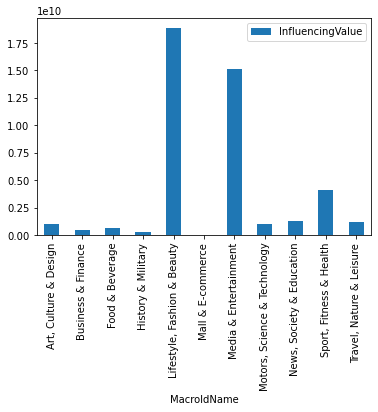

In [12]:
#visualize
core_users_categories.groupby('MacroIdName').agg('sum').plot(kind='bar', y = 'InfluencingValue')
plt.show()

### Regarding the distribution of the macro and categories

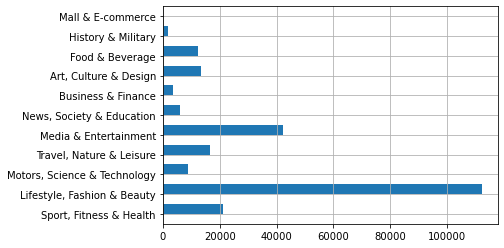

In [9]:
#the number of Core users grouped by macro categories
core_users_categories['MacroIdName'].hist(bins=20, orientation = 'horizontal')
plt.show()


In [10]:
x = core_users_categories.groupby('MicroIdName').agg('sum').sort_values('InfluencingValue')

### the second section

In [58]:
core_users_categories.index=core_users_categories.index.astype('str')
#Join the tables for
core_users_users = core_users_categories.merge(users, how= 'inner', on= 'UserId')
core_users_users = core_users_users.drop(columns=['Unnamed: 0'])
core_users_users['Biography'] = core_users_users['Biography'].astype('str')

In [59]:
core_users_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202905 entries, 1000242363 to 9999951
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   InfluencingValue   202905 non-null  int64  
 1   MacroId            202905 non-null  int64  
 2   MicroId            202905 non-null  int64  
 3   PositiveSentiment  202905 non-null  float64
 4   NeutralSentiment   202905 non-null  float64
 5   NegativeSentiment  202905 non-null  float64
 6   MacroIdName        201701 non-null  object 
 7   MicroIdName        201131 non-null  object 
 8   Username           202905 non-null  object 
 9   FullName           199119 non-null  object 
 10  ProfilePicUrl      202905 non-null  object 
 11  Biography          202905 non-null  object 
 12  FollowersCount     202905 non-null  float64
 13  IsBusiness         202905 non-null  float64
 14  IsVerified         202905 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usag

In [60]:
core_users_users2 = core_users_users
core_users_users2 ['Len'] = core_users_users2['Biography'].apply(lambda y:len(y))

###  regarding the length of the biographies of the profiles that have the best influencing value

In [66]:
core_users_users2.sort_values(by = ['InfluencingValue', 'Len'], ascending = [False, False])

,InfluencingValue,MacroId,MicroId,PositiveSentiment,NeutralSentiment,NegativeSentiment,MacroIdName,MicroIdName,Username,FullName,ProfilePicUrl,Biography,FollowersCount,IsBusiness,IsVerified,Len
UserId,,,,,,,,,,,,,,,,
3056967125,170991087,5,41,0.00,0.00,0.00,Media & Entertainment,"Comics, Illustrations & Manga",abcdefghi__lmnopqrstuvwxyz,Jungkook,https://inflead-public.s3-eu-west-1.amazonaws....,BTS,29349864.0,0.0,1.0,3
12281817,165294190,4,35,-1.00,-1.00,-1.00,"Lifestyle, Fashion & Beauty",Makeup & Perfumes,kyliejenner,Kylie 🤍,https://inflead-public.s3-eu-west-1.amazonaws....,@kyliecosmetics @kylieskin @kylieswim @kyliebaby,316497126.0,0.0,1.0,48
779085683,156186710,5,47,33.24,33.96,26.79,Media & Entertainment,Social media & Digital,khaby00,Khaby Lame,https://inflead-public.s3-eu-west-1.amazonaws....,📱TikTok:130 Mln+\n✍🏻Social Manager @riggioales...,71817635.0,0.0,1.0,110
173560420,145792702,8,62,34.65,30.13,27.22,"Sport, Fitness & Health",Football,cristiano,Cristiano Ronaldo,https://inflead-public.s3-eu-west-1.amazonaws....,nan,409527652.0,0.0,1.0,3
427553890,122591707,8,62,-1.00,-1.00,-1.00,"Sport, Fitness & Health",Football,leomessi,Leo Messi,https://inflead-public.s3-eu-west-1.amazonaws....,Bienvenidos a la cuenta oficial de Instagram d...,310525010.0,1.0,1.0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024416991,0,-2,-2,0.00,0.00,0.00,NaN,NaN,street_style_karaj,NaN,https://inflead-public.s3-eu-west-1.amazonaws....,.,345657.0,0.0,0.0,1
6905185436,-4026,4,29,-1.00,-1.00,-1.00,"Lifestyle, Fashion & Beauty",Family & Couples,alubb.salina,Salina Alubb,https://inflead-public.s3-eu-west-1.amazonaws....,Thick thighs and pretty eyes. 😘😘💋😍💯 @alubb.sal...,464775.0,0.0,0.0,70
905662644,-5317,5,40,-1.00,-1.00,-1.00,Media & Entertainment,Cinema & Theatre,maryjuntakahashi,Maryjun Takahashi 高橋メアリージュン,https://inflead-public.s3-eu-west-1.amazonaws....,🇯🇵🇵🇭🇪🇸actress\nLove🌅🌳🌌🌍🏜🏝🦁🦏🐒🦒🐬🦎Nickname 🇯🇵メアちゃ...,366268.0,0.0,1.0,124
